<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Guillermo Cortés Medina</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudantía
## 1.1 Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
## 1.2 Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import gzip

# Carga y grafica archivo CSV
csv_path = "AbsorbanceTE_0-0.csv"

try:
    # Cargamos el CSV
    df_csv = pd.read_csv(csv_path)
    print("Primeros registros del CSV:")
    print(df_csv.head())

# Se asume que la primera columna es el eje X y la segunda columna es el eje Y.
    plt.figure(figsize=(10, 4))
    plt.plot(df_csv.iloc[:, 0], df_csv.iloc[:, 1], marker='o', linestyle='-')
    plt.title("Gráfico de Datos del CSV")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"No se encontró el archivo: {csv_path}")

# Carga y gráfica archivo TXT comprimido (GZ)
txt_path = "H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz"

try:
    # Se abre archivo GZ en modo texto
    with gzip.open(txt_path, 'rt') as f:
        # Se asume que los datos están delimitados
        df_txt = pd.read_csv(f, delim_whitespace=True, header=None)

    print("Primeros registros del TXT (GZ):")
    print(df_txt.head())

    # Se utiliza el índice de las muestras en el eje X y la primera columna en el eje Y.
    plt.figure(figsize=(10, 4))
    plt.plot(df_txt.index, df_txt.iloc[:, 0], marker='.', linestyle='-')
    plt.title("Gráfico de Datos del TXT (GZ)")
    plt.xlabel("Índice de Muestras")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"No se encontró el archivo: {txt_path}")


No se encontró el archivo: AbsorbanceTE_0-0.csv
No se encontró el archivo: H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz


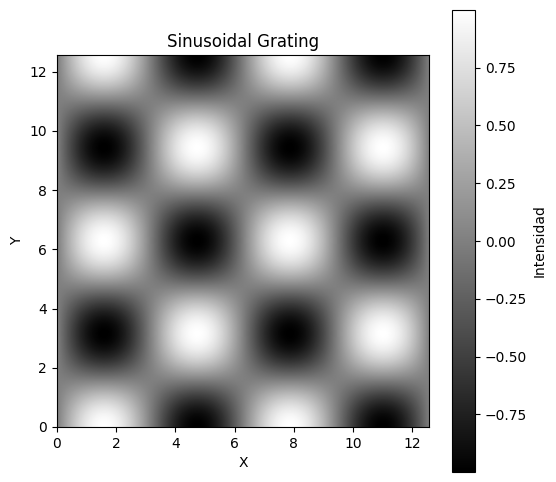

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Se crea una grilla bidimensional
x = np.linspace(0, 4 * np.pi, 400)
y = np.linspace(0, 4 * np.pi, 400)
X, Y = np.meshgrid(x, y)

# Se genera la sinusoidal "grating" utilizando funciones seno y coseno
grating = np.sin(X) * np.cos(Y)

# Se grafica la imagen usando imshow
plt.figure(figsize=(6, 6))
plt.imshow(grating, cmap='gray', extent=(0, 4*np.pi, 0, 4*np.pi))
plt.title("Sinusoidal Grating")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Intensidad")
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizarás para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


$$
s(t) = \sin(2\pi t) + e^{-0.2t}\cos(4\pi t)
$$


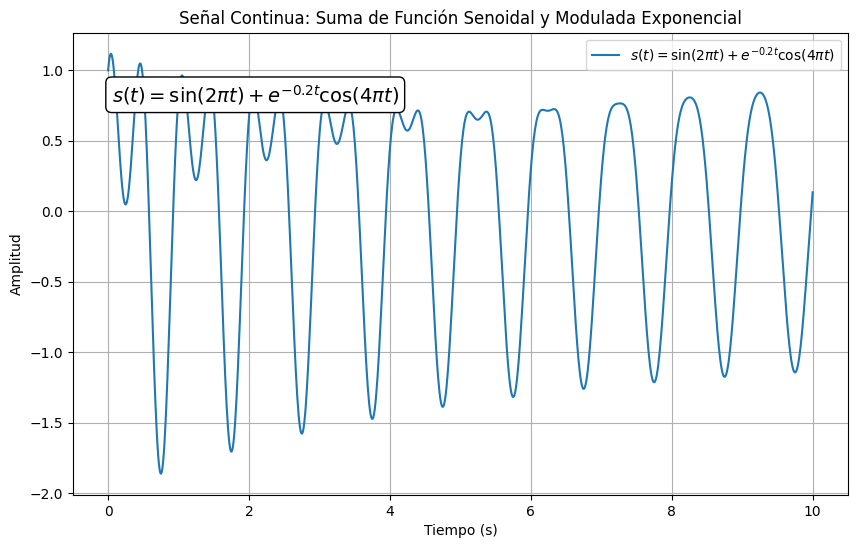

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Se define el vector de tiempo de 0 a 10 segundos con 1000 muestras
t = np.linspace(0, 10, 1000)

# Definición de señal:
s = np.sin(2 * np.pi * t) + np.exp(-0.2 * t) * np.cos(4 * np.pi * t)   #s(t) = sin(2*pi*t) + exp(-0.2*t)*cos(4*pi*t)

# Gráfica de la señal
plt.figure(figsize=(10, 6))
plt.plot(t, s, label=r'$s(t)=\sin(2\pi t) + e^{-0.2t}\cos(4\pi t)$')
plt.title("Señal Continua: Suma de Función Senoidal y Modulada Exponencial")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.grid(True)

# Se agrega la ecuación en una caja de texto dentro de la gráfica (?
ecuacion = r"$s(t)=\sin(2\pi t) + e^{-0.2t}\cos(4\pi t)$"
plt.text(0.05, 0.85, ecuacion, transform=plt.gca().transAxes, fontsize=14,
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round"))

plt.show()


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

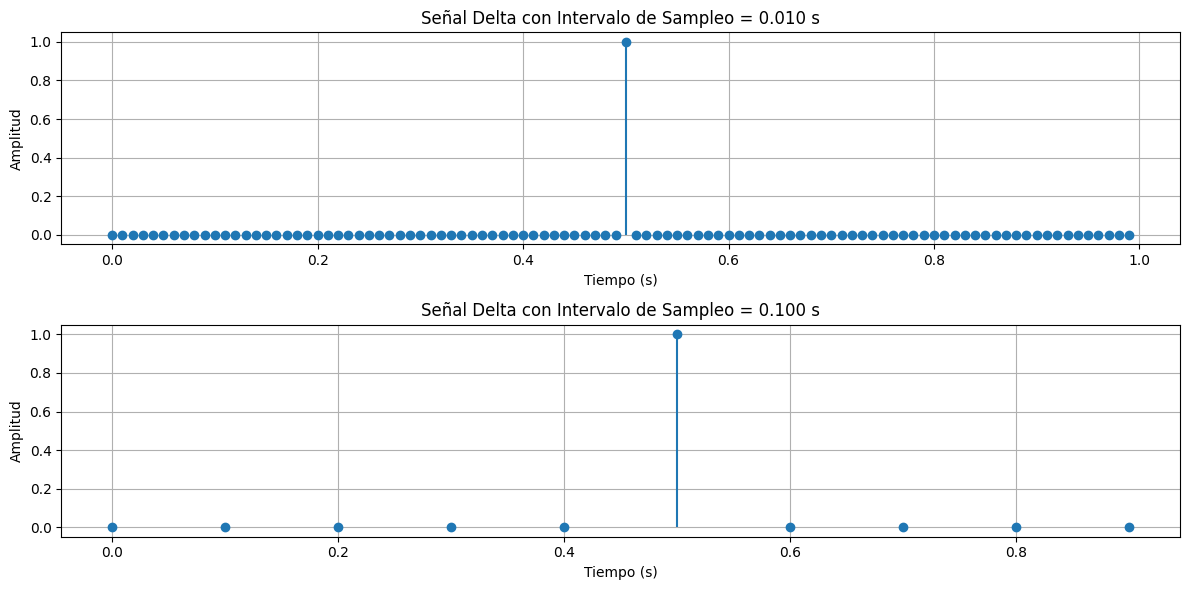

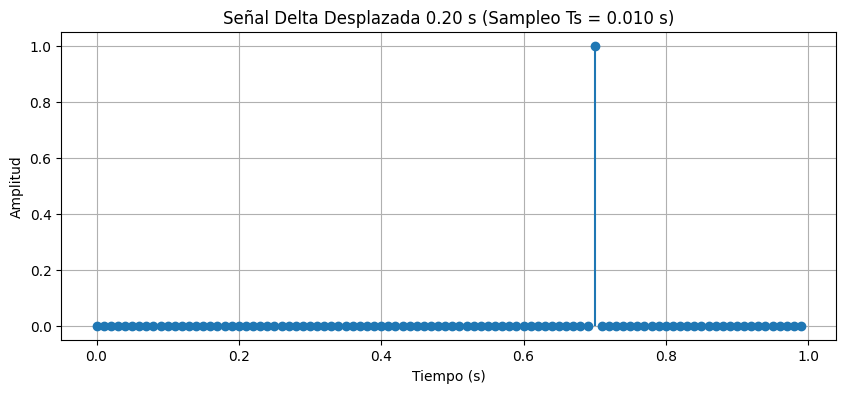

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Intervalo de sampleo pequeño y grande
Ts1 = 0.01   # intervalo de sampleo 10 ms
Ts2 = 0.1    # intervalo de sampleo 100 ms

# Se definen dos vectores de tiempo para el mismo intervalo total
t1 = np.arange(0, 1, Ts1)
t2 = np.arange(0, 1, Ts2)

# Creación de señales delta
delta1 = np.zeros(len(t1))
center_idx1 = len(t1) // 2  # índice central
delta1[center_idx1] = 1

delta2 = np.zeros(len(t2))
center_idx2 = len(t2) // 2
delta2[center_idx2] = 1

# Gráfica señal delta para ambos intervalos de sampleo
plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.stem(t1, delta1, basefmt=" ")
plt.title("Señal Delta con Intervalo de Sampleo = {:.3f} s".format(Ts1))
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2,1,2)
plt.stem(t2, delta2, basefmt=" ")
plt.title("Señal Delta con Intervalo de Sampleo = {:.3f} s".format(Ts2))
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------------

# Se define el desplazamiento
desplazamiento = 0.2 # segundos de retardo

# Se crea función para calcular cuántas muestras equivale ese desplazamiento para el sampleo Ts1
shift_samples1 = int(desplazamiento / Ts1)

# Se crea una nueva señal delta a partir de 'delta1' desplazado
delta1_shifted = np.zeros_like(delta1)
# Para asegurarnos que el índice desplazado no exceda el tamaño del vector
if center_idx1 + shift_samples1 < len(delta1):
    delta1_shifted[center_idx1 + shift_samples1] = 1

plt.figure(figsize=(10, 4))
plt.stem(t1, delta1_shifted, basefmt=" ")
plt.title("Señal Delta Desplazada {:.2f} s (Sampleo Ts = {:.3f} s)".format(desplazamiento, Ts1))
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

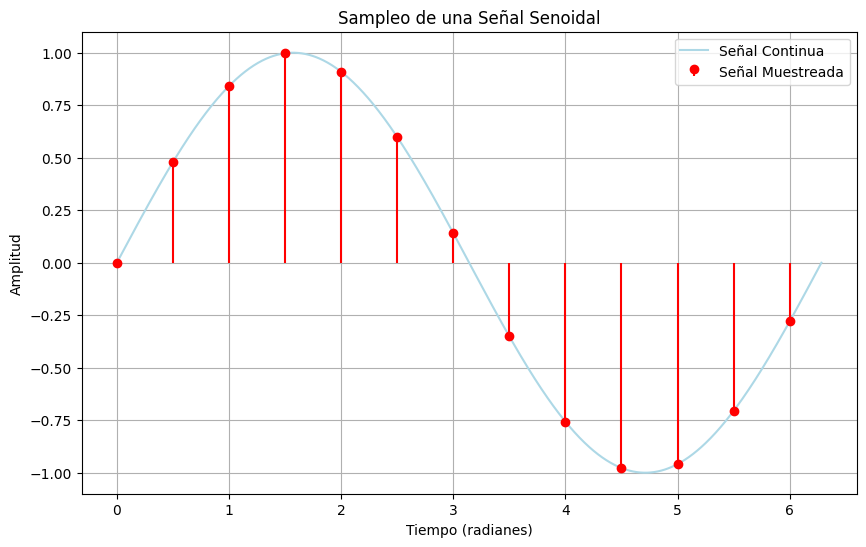

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Se define un vector de tiempo muy denso para mostrar la señal continua.
t_cont = np.linspace(0, 2 * np.pi, 1000)
señal_cont = np.sin(t_cont)

# Se define el período de muestreo
Ts = 0.5  # Intervalo de muestreo(radianes en este caso)
# Instantes de muestreo
t_sampleo = np.arange(0, 2 * np.pi, Ts)
# Se evalúa la función senoidal en los instantes de muestreo
muestra_señal = np.sin(t_sampleo)

# Grafica
plt.figure(figsize=(10,6))
# Se grafica la señal continua para referencia
plt.plot(t_cont, señal_cont, label='Señal Continua', color='lightblue')
# Se grafican los puntos muestreados utilizando stem
plt.stem(t_sampleo, muestra_señal, basefmt=" ", linefmt='r-', markerfmt='ro', label='Señal Muestreada')
plt.xlabel('Tiempo (radianes)')
plt.ylabel('Amplitud')
plt.title('Sampleo de una Señal Senoidal')
plt.legend()
plt.grid(True)
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

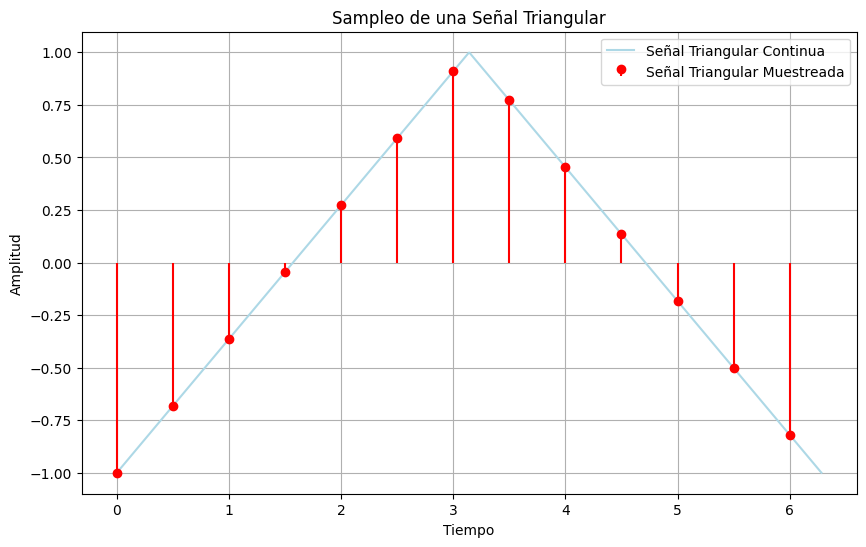

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth


# Definir el vector de tiempo continuo
t_cont = np.linspace(0, 2 * np.pi, 1000)
# Se genera la señal triangular continua usando sawtooth
triangular_cont = sawtooth(t_cont, width=0.5)

# Se definine el intervalo de sampleo (en las mismas unidades de tiempo)
Ts = 0.5  # intervalo de muestreo
# Se crea el vector de tiempo muestreado
t_sample = np.arange(0, 2 * np.pi, Ts)
# Se evalua la señal triangular en los instantes de muestreo
triangular_sample = sawtooth(t_sample, width=0.5)

# Gráfica
plt.figure(figsize=(10, 6))
# Graficamos la señal continua
plt.plot(t_cont, triangular_cont, label='Señal Triangular Continua', color='lightblue')
# Graficamos los puntos muestreados usando stem
plt.stem(t_sample, triangular_sample, basefmt=" ", linefmt='r-', markerfmt='ro', label='Señal Triangular Muestreada')
plt.title("Sampleo de una Señal Triangular")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

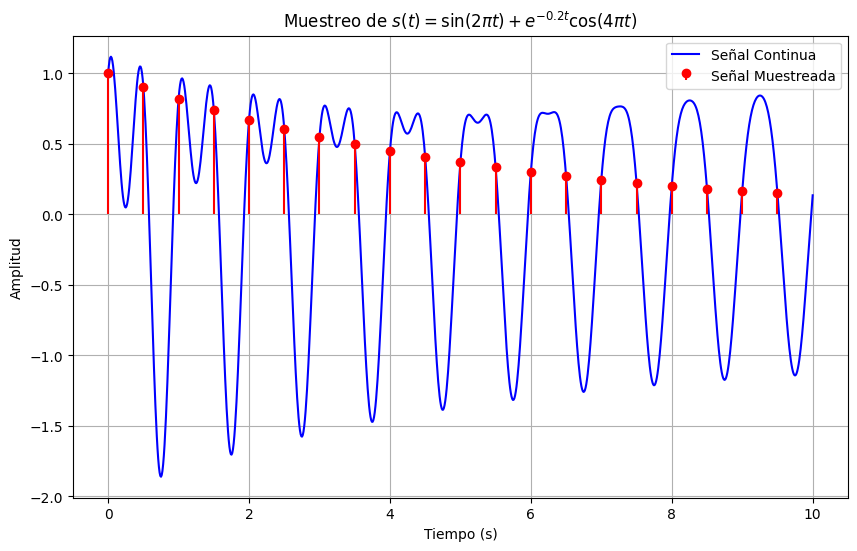

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos un vector de tiempo denso para simular la continuidad
t_cont = np.linspace(0, 10, 1000)
# Definir la función s(t)
s_cont = np.sin(2 * np.pi * t_cont) + np.exp(-0.2 * t_cont) * np.cos(4 * np.pi * t_cont)

# Definir el intervalo de muestreo
Ts = 0.5  # 0.5 segundos
# Se crea el vector de tiempo discreto
t_sample = np.arange(0, 10, Ts)
# Evaluamos la señal en los instantes de muestreo
s_sample = np.sin(2 * np.pi * t_sample) + np.exp(-0.2 * t_sample) * np.cos(4 * np.pi * t_sample)

# Gráfica
plt.figure(figsize=(10, 6))
# Graficar la señal continua
plt.plot(t_cont, s_cont, label='Señal Continua', color='blue')
# Graficar los puntos muestreados con stem
plt.stem(t_sample, s_sample, basefmt=" ", linefmt='r-', markerfmt='ro', label='Señal Muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(r"Muestreo de $s(t)=\sin(2\pi t)+e^{-0.2t}\cos(4\pi t)$")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

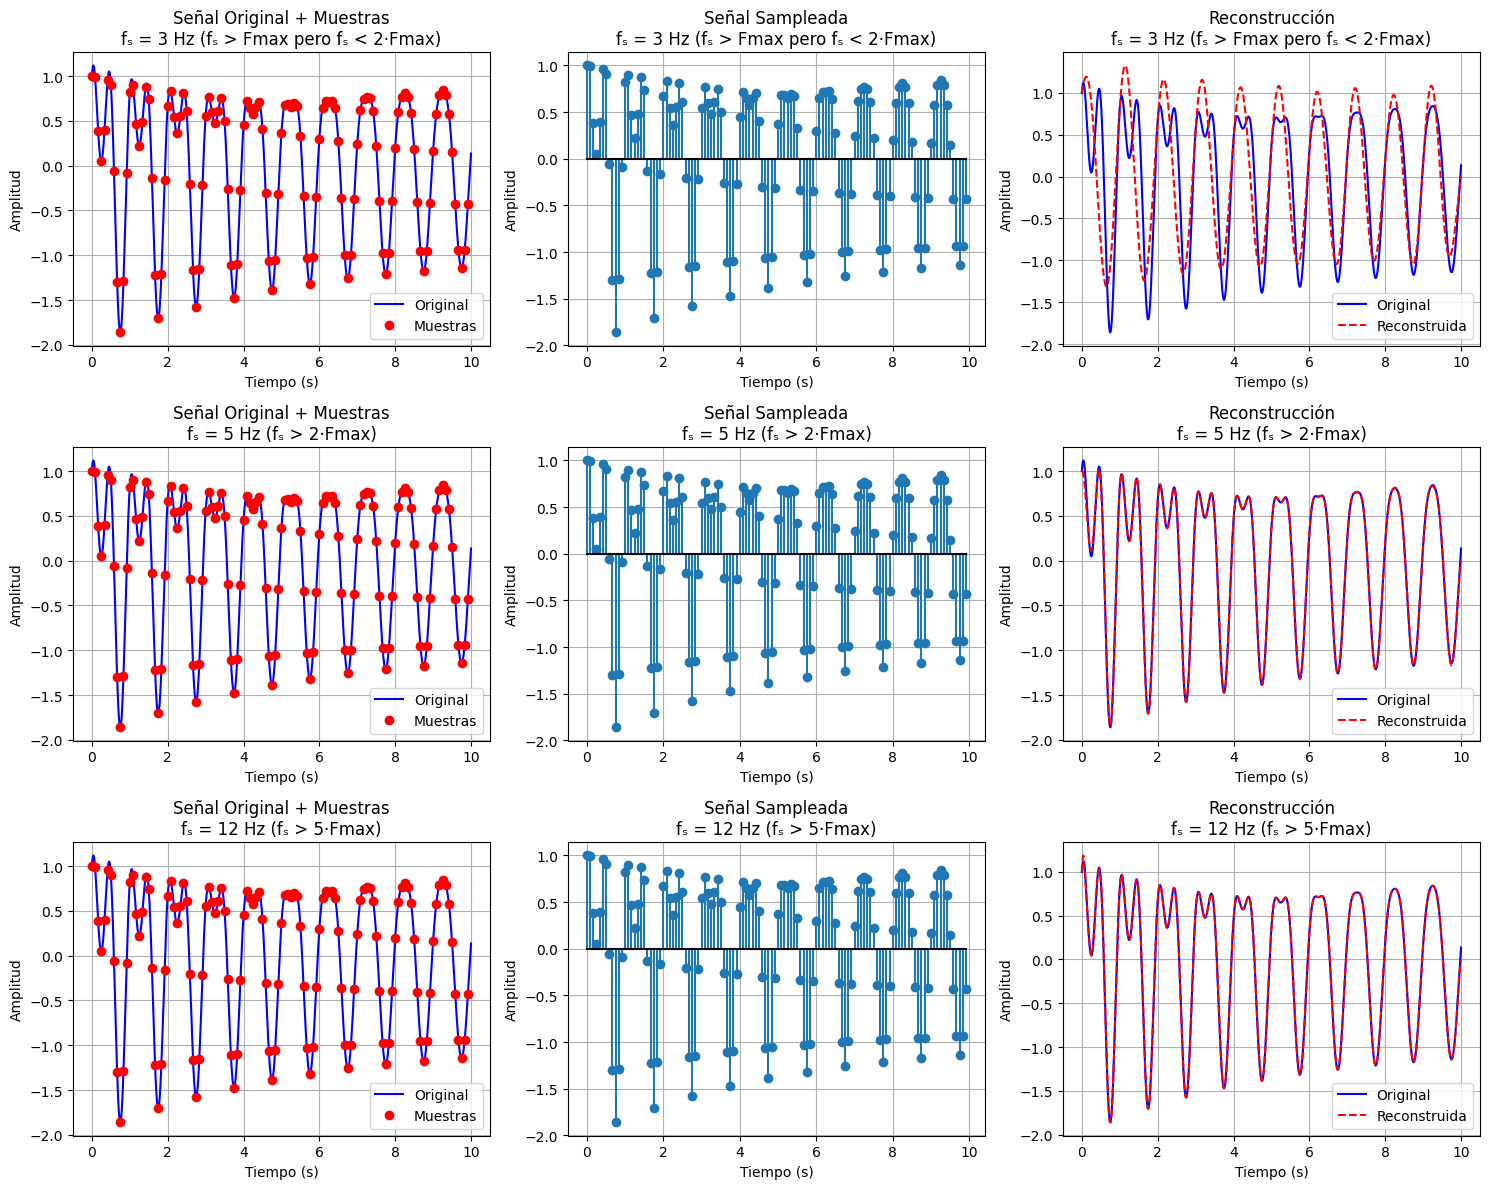

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Función de reconstrucción utilizando 'interpolación sinc'
def reconstruct_signal(t, t_samples, s_samples, T_s):
    s_reconstruida = np.zeros_like(t)
    for n, t_n in enumerate(t_samples):
        # np.sinc((t-t_n)/T_s) equivale a sinc((t-t_n)/(T_s))
        s_reconstruida += s_samples[n] * np.sinc((t - t_n) / T_s)
    return s_reconstruida

# Definición de la señal original continua
T_end = 10  # Tiempo final en segundos
t_cont = np.linspace(0, T_end, 2000)
s_cont = np.sin(2 * np.pi * t_cont) + np.exp(-0.2 * t_cont) * np.cos(4 * np.pi * t_cont)

# Las tres frecuencias de muestreo a evaluar
# Fmax = 2 Hz para nuestra señal

# Caso 1: f_s = 3 Hz   (3 > 2 pero < 2*2 = 4 Hz)
# Caso 2: f_s = 5 Hz   (5 > 2*2 = 4 Hz)
# Caso 3: f_s = 12 Hz  (12 > 5*2 = 10 Hz)

valores_fs = [3, 5, 12]
titulo_casos = [
    "fₛ = 3 Hz (fₛ > Fmax pero fₛ < 2·Fmax)",
    "fₛ = 5 Hz (fₛ > 2·Fmax)",
    "fₛ = 12 Hz (fₛ > 5·Fmax)"
]

# Se crea la figura con 3 filas y 3 columnas para mostrar cada caso
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, f_s in enumerate(valores_fs):
    T_s = 1 / f_s
    # Definir los instantes de muestreo
    t_muestreo = np.arange(0, T_end, T_s)
    # Evaluar la señal en los instantes de muestreo
    s_muestreada = np.sin(2 * np.pi * t_muestreo) + np.exp(-0.2 * t_muestreo) * np.cos(4 * np.pi * t_muestreo)
    # Reconstruir la señal a partir de las muestras
    s_rec = reconstruct_signal(t_cont, t_muestreo, s_muestreada, T_s)

    # Columna 1: Señal original continua con superposición de muestras
    axs[i, 0].plot(t_cont, s_cont, label="Original", color="blue")
    axs[i, 0].plot(t_muestreo, s_muestreada, 'ro', label="Muestras")
    axs[i, 0].set_title("Señal Original + Muestras\n" + titulo_casos[i])
    axs[i, 0].set_xlabel("Tiempo (s)")
    axs[i, 0].set_ylabel("Amplitud")
    axs[i, 0].grid(True)
    axs[i, 0].legend()

    # Columna 2: Solo la señal muestreada (usando stem)
    axs[i, 1].stem(t_muestreo, s_muestreada, basefmt="k")
    axs[i, 1].set_title("Señal Sampleada\n" + titulo_casos[i])
    axs[i, 1].set_xlabel("Tiempo (s)")
    axs[i, 1].set_ylabel("Amplitud")
    axs[i, 1].grid(True)

    # Columna 3: Señal reconstruida comparada con la original
    axs[i, 2].plot(t_cont, s_cont, label="Original", color="blue")
    axs[i, 2].plot(t_cont, s_rec, '--', label="Reconstruida", color="red")
    axs[i, 2].set_title("Reconstrucción\n" + titulo_casos[i])
    axs[i, 2].set_xlabel("Tiempo (s)")
    axs[i, 2].set_ylabel("Amplitud")
    axs[i, 2].grid(True)
    axs[i, 2].legend()

plt.tight_layout()
plt.show()

# Nota: Esta última parte fue con ayuda de ChatGPT, debo admitirlo

## 4. Análisis en el dominio de la frecuencia


### 4.1 Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


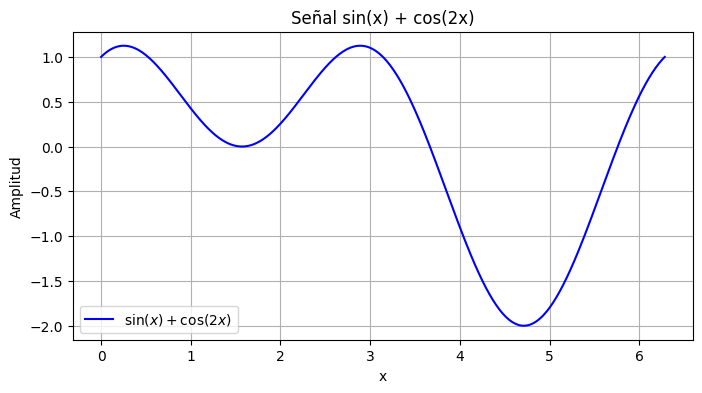

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el vector de valores para x
x = np.linspace(0, 2 * np.pi, 500)

# Calcular la señal: sin(x) + cos(2x)
y = np.sin(x) + np.cos(2 * x)

# Graficar la señal
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=r'$\sin(x)+\cos(2x)$', color='blue')
plt.title("Señal sin(x) + cos(2x)")
plt.xlabel("x")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


### 4.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

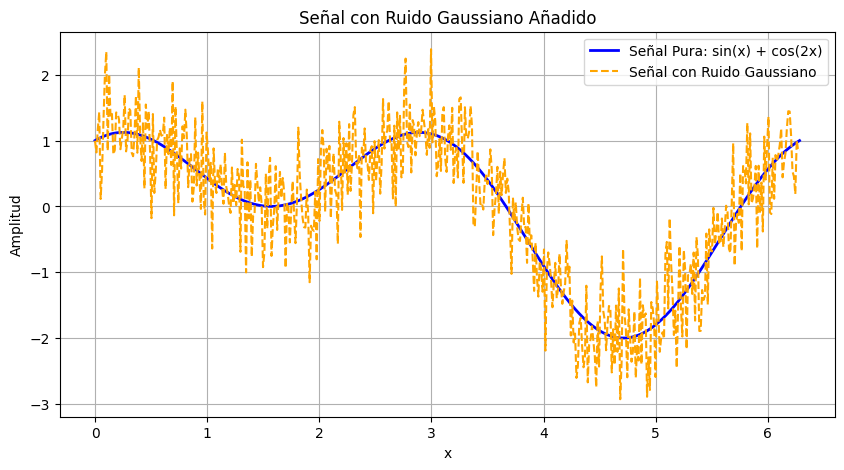

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el vector de valores para x, por ejemplo, de 0 a 2π
x = np.linspace(0, 2 * np.pi, 500)

# Señal original pura
y_pura = np.sin(x) + np.cos(2 * x)

# Generar ruido gaussiano: np.random.randn genera muestras de una distribución normal estándar
amplitud_ruido = 0.5  # Ajusta la amplitud del ruido a tu gusto
ruido = amplitud_ruido * np.random.randn(len(x))

# Señal con ruido añadido
y_ruidosa = y_pura + ruido

# Graficar ambas señales para comparar
plt.figure(figsize=(10, 5))
plt.plot(x, y_pura, label='Señal Pura: sin(x) + cos(2x)', color='blue', linewidth=2)
plt.plot(x, y_ruidosa, label='Señal con Ruido Gaussiano', color='orange', linestyle='--')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.title('Señal con Ruido Gaussiano Añadido')
plt.legend()
plt.grid(True)
plt.show()


### 4.3 Obtenga la transformada de Fourier para las dos señales que generaste previamente


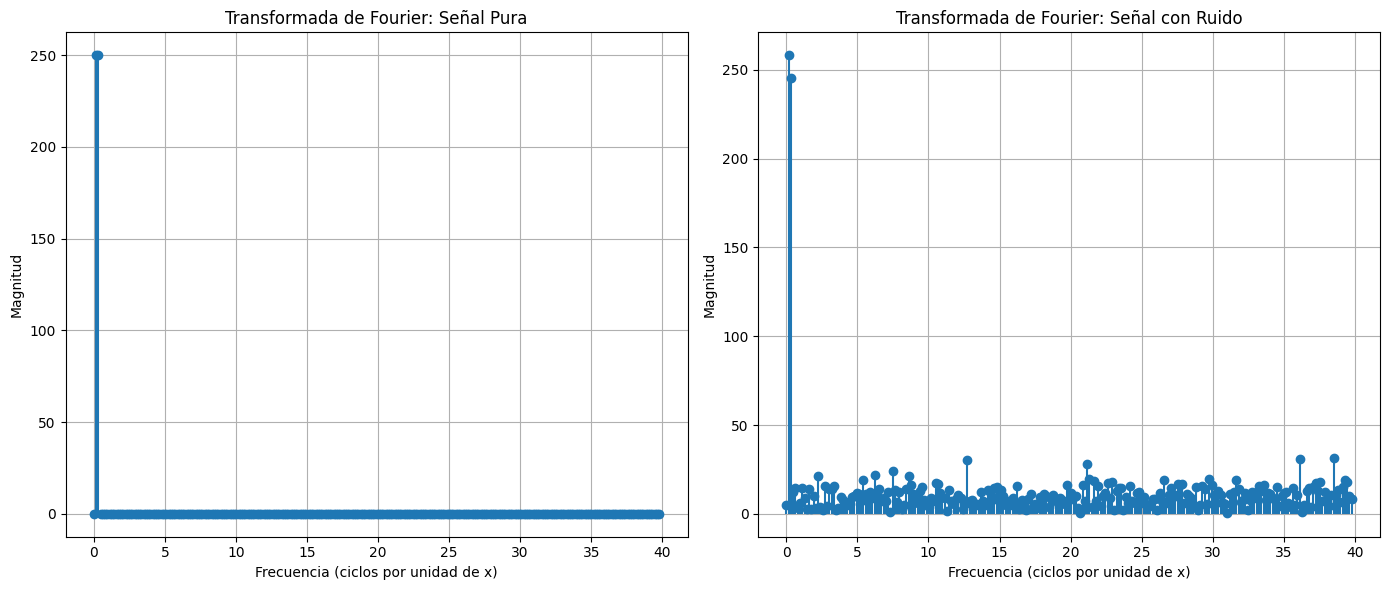

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Vector x
x = np.linspace(0, 2*np.pi, 500, endpoint=False)

# Señal pura: sin(x) + cos(2x)
y_pura = np.sin(x) + np.cos(2*x)

# Señal con ruido gaussiano: se suma ruido de amplitud 0.5
amplitud_ruido = 0.5
y_ruidosa = y_pura + amplitud_ruido * np.random.randn(len(x))

# Número de muestras y periodo de muestreo
N = len(x)
d = x[1] - x[0]  # Espaciado en x

# Calcular la FFT
freq = np.fft.rfftfreq(N, d=d)
Y_pura = np.fft.rfft(y_pura)
Y_ruidosa = np.fft.rfft(y_ruidosa)

#Gráficar
plt.figure(figsize=(14, 6))

# Señal pura
plt.subplot(1, 2, 1)
plt.stem(freq, np.abs(Y_pura), basefmt=" ")
plt.title("Transformada de Fourier: Señal Pura")
plt.xlabel("Frecuencia (ciclos por unidad de x)")
plt.ylabel("Magnitud")
plt.grid(True)

# Señal con ruido
plt.subplot(1, 2, 2)
plt.stem(freq, np.abs(Y_ruidosa), basefmt=" ")
plt.title("Transformada de Fourier: Señal con Ruido")
plt.xlabel("Frecuencia (ciclos por unidad de x)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()


### 4.4 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

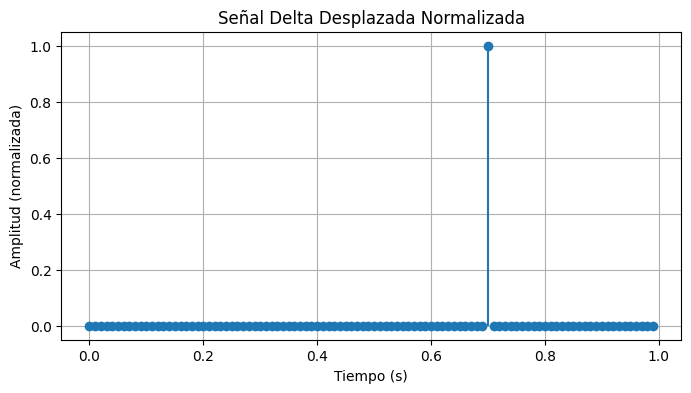

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Delta
Ts = 0.01        # Intervalo de sampleo (10 ms)
t = np.arange(0, 1, Ts)  # Vector de tiempo

# Crear una señal delta centrada
delta = np.zeros(len(t))
indice_central = len(t) // 2
delta[indice_central] = 1

# Se desea desplazar la señal 0.2 s (retardo)
desplazamiento = 0.2        # en segundos
muestras_desplazadas = int(desplazamiento / Ts)  # Número de muestras a desplazar

delta_desplazada = np.zeros_like(delta)
if indice_central + muestras_desplazadas < len(delta):
    delta_desplazada[indice_central + muestras_desplazadas] = 1

# --- Normalización de la señal delta desplazada ---
# La normalización se realiza dividiendo la señal entre su valor máximo absoluto.
valor_maximo = np.max(np.abs(delta_desplazada))
delta_normalizado = delta_desplazada / valor_maximo if valor_maximo != 0 else delta_desplazada

# --- Graficar la señal normalizada ---
plt.figure(figsize=(8, 4))
plt.stem(t, delta_normalizado, basefmt=" ")
plt.title("Señal Delta Desplazada Normalizada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (normalizada)")
plt.grid(True)
plt.show()


### 4.5 Encuentra la transformada inversa de Fourier
_Solo para una señal de las dos que generaste inicialmente_.

En este caso puede usar una librería.

Explica en detalle que hace la librería y el resultado que arroja.

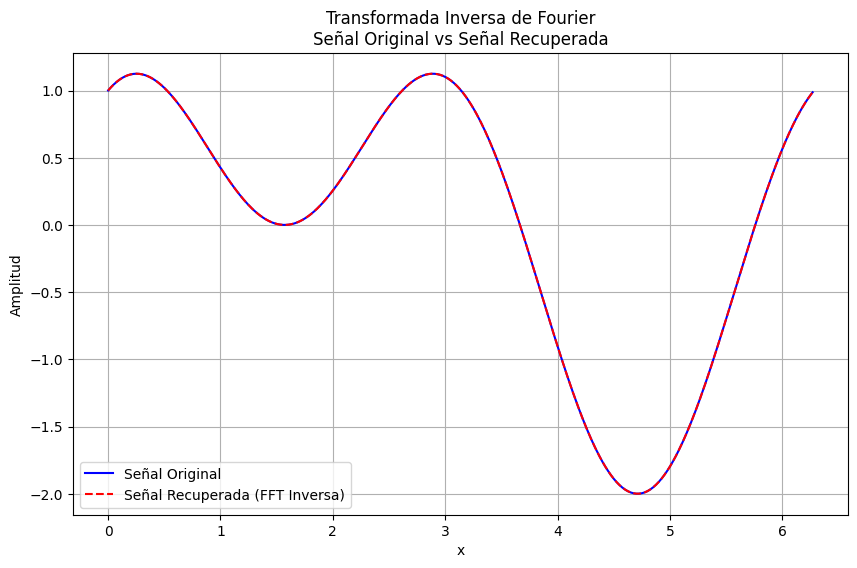

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos un vector 'x'
x = np.linspace(0, 2*np.pi, 500, endpoint=False)

# Señal: y(x) = sin(x) + cos(2x)
señal_original = np.sin(x) + np.cos(2*x)


# Para señales reales se puede usar np.fft.rfft, que devuelve solo las frecuencias positivas.
Y = np.fft.rfft(señal_original)

# --- 3. Calcular la transformada inversa de Fourier ---
# Usamos np.fft.irfft para recuperar la señal original del dominio de frecuencias.
señal_recuperada = np.fft.irfft(Y, n=500)

# --- 4. Graficar la señal original y la señal recuperada ---
plt.figure(figsize=(10, 6))
plt.plot(x, señal_original, label="Señal Original", color="blue")
plt.plot(x, señal_recuperada, '--', label="Señal Recuperada (FFT Inversa)", color="red")
plt.xlabel("x")
plt.ylabel("Amplitud")
plt.title("Transformada Inversa de Fourier\nSeñal Original vs Señal Recuperada")
plt.legend()
plt.grid(True)
plt.show()


# 5 Explica tus hallazgos (explicar basado en la teoría)
- Explica que comprobaste con relación al sampleo de señales.
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

### Desarrollo

El muestreo consiste en representar una señal continua mediante valores discretos tomados a intervalos regulares. Para una reconstrucción adecuada se debe cumplir el teorema de Nyquist, que requiere que la frecuencia de muestreo sea al menos el doble de la frecuencia máxima presente en la señal, es decir:  
$$
f_s \geq 2F_{\text{max}}
$$

**Señal Pura:** La señal  
$$
y(x) = \sin(x) + \cos(2x)
$$  
muestra componentes claras y definidas, con picos precisos en el dominio de la frecuencia.

**Señal con Ruido Gaussiano:**  
Al agregar ruido gaussiano se introducen fluctuaciones aleatorias en la señal, lo que produce en el espectro un fondo "ruidoso" adicional a los picos correspondientes a la señal original.

**Transformada de Fourier:**  
La transformada de Fourier descompone una señal en sus componentes frecuenciales. Para la señal pura se evidencian picos en las frecuencias dominantes, mientras que en la señal con ruido se observa, además de esos picos, una elevación general en el espectro debido a la dispersión del ruido.


## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html